### ***Sea Level Predictor***

You will analyze a dataset of the global average sea level change since 1880 and use this data to predict the sea level change through year 2050.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("epa-sea-level.csv")
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


In [4]:
df.describe()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
count,134.000000,134.000000,134.000000,134.000000,21.000000
mean,1946.500000,3.650341,3.204666,4.096016,7.363746
std,38.826537,2.485692,2.663781,2.312581,0.691038
min,1880.000000,-0.440945,-1.346457,0.464567,6.297493
25%,1913.250000,1.632874,1.078740,2.240157,6.848690
50%,1946.500000,3.312992,2.915354,3.710630,7.488353
75%,1979.750000,5.587598,5.329724,5.845472,7.907365
max,2013.000000,9.326772,8.992126,9.661417,8.546648


In [5]:
df.shape

(134, 5)

As we can see NOAA Adjusted Sea Level has a lot of missing data, hence we can remove the column for further analysis.

In [6]:
df.drop(columns=['NOAA Adjusted Sea Level'],inplace=True)

### **Question 1**

Create a scatter plot using the "Year" column as the x-axis and the "CSIRO Adjusted Sea Level" column as the y-axix.

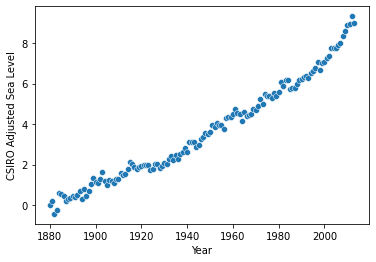

In [7]:
sb.scatterplot(x='Year',y='CSIRO Adjusted Sea Level',data=df)

### **Question 2**

Use the linear regression function to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.


Reference - *https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html*

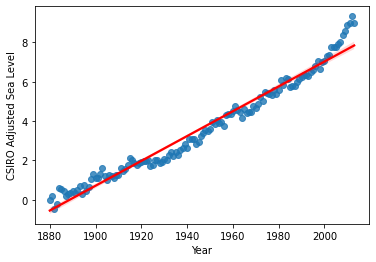

In [8]:
sb.regplot(x=df['Year'], y=df['CSIRO Adjusted Sea Level'], line_kws={"color": "red"})

In [9]:
from scipy.stats import linregress

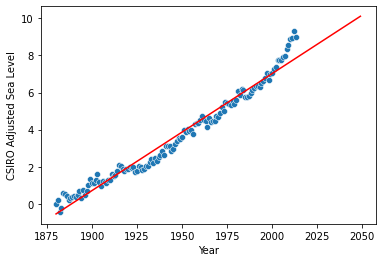

In [10]:
line1 = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
xA = np.arange(1880,2050,1)
yA = xA*line1.slope + line1.intercept

sb.scatterplot(x=df['Year'], y=df['CSIRO Adjusted Sea Level'])
plt.plot(xA,yA,color='red')


In [11]:
print("Predicted sea level of 2050 - " , 2050*line1.slope + line1.intercept)

Predicted sea level of 2050 -  10.175455257136548


### **Question 3**

Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.

The x label should be "Year", the y label should be "Sea Level (inches)", and the title should be "Rise in Sea Level".

In [12]:
np.array(df['Year'][df['Year']>=2000])

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013])

In [13]:
df1 = df.loc[df['Year']>=2000]
df1.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound
120,2000,7.062992,6.791339,7.334646
121,2001,7.287402,7.019685,7.555118
122,2002,7.381890,7.110236,7.653543
123,2003,7.759843,7.484252,8.035433
124,2004,7.740157,7.464567,8.015748


In [14]:
df1.shape

(14, 4)

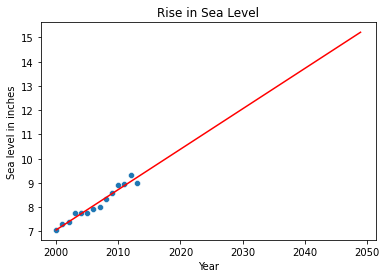

In [15]:
line2 = linregress(df1['Year'], df1['CSIRO Adjusted Sea Level'])
xB = np.arange(2000,2050,1)
yB = xB*line2.slope + line2.intercept

sb.scatterplot(x=df1['Year'], y=df1['CSIRO Adjusted Sea Level'])
plt.plot(xB,yB,color='red')
plt.xlabel("Year")
plt.ylabel("Sea level in inches")
plt.title("Rise in Sea Level")
plt.show()

In [16]:
print("Predicted sea level of 2050 - " , 2050*line2.slope + line2.intercept)

Predicted sea level of 2050 -  15.382443524364874
